We bring the particle back up to high pressure and calibrate it's charge again...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from analysis_utils import *

Pressure about 0.4 mbar

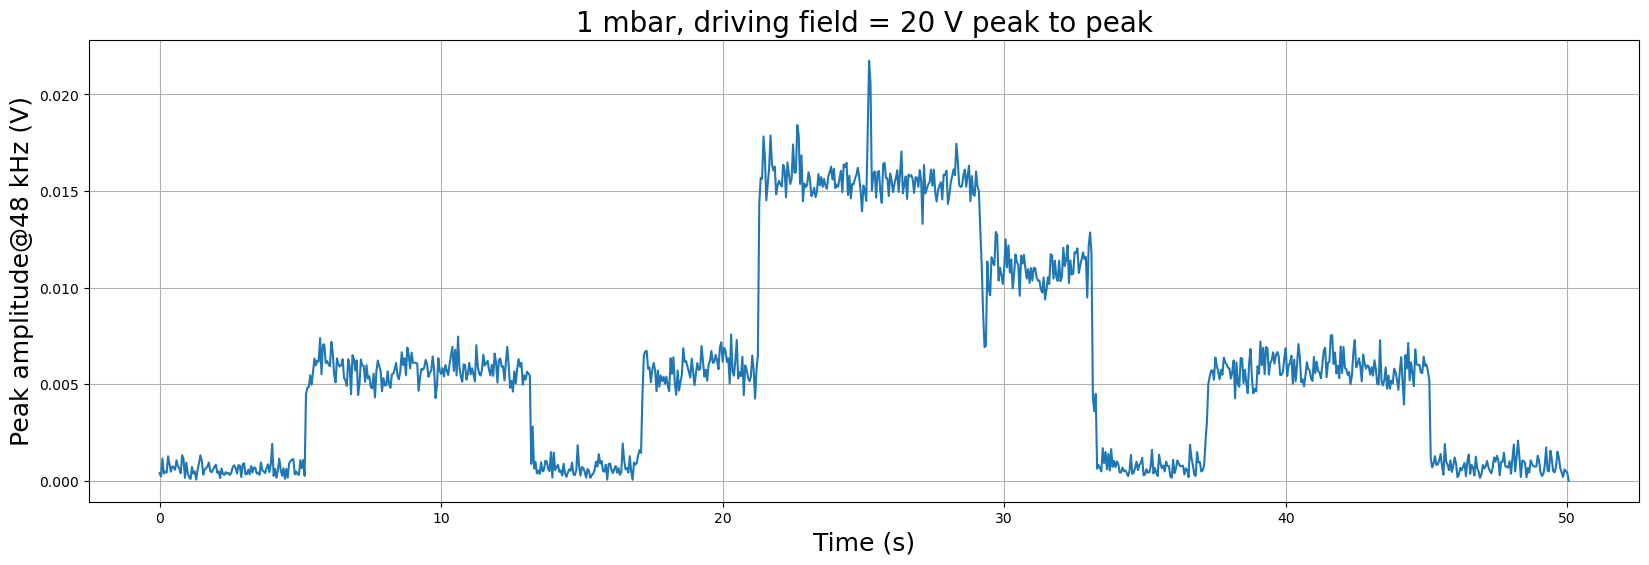

In [25]:
data_file = r"C:\Users\microspheres\Desktop\100nmsphere2\charging_50s_48khz_4.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

fig, ax = plot_peak_amp(data, 48000)

Now there are 2 charges on the sphere.

In [2]:
data_file = r"C:\Users\microspheres\Desktop\100nmsphere2\noefield_20s_0_4mbar_4.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

ff, pp = get_psd(data)
ffx, ppx = get_psd(data, channel=2)

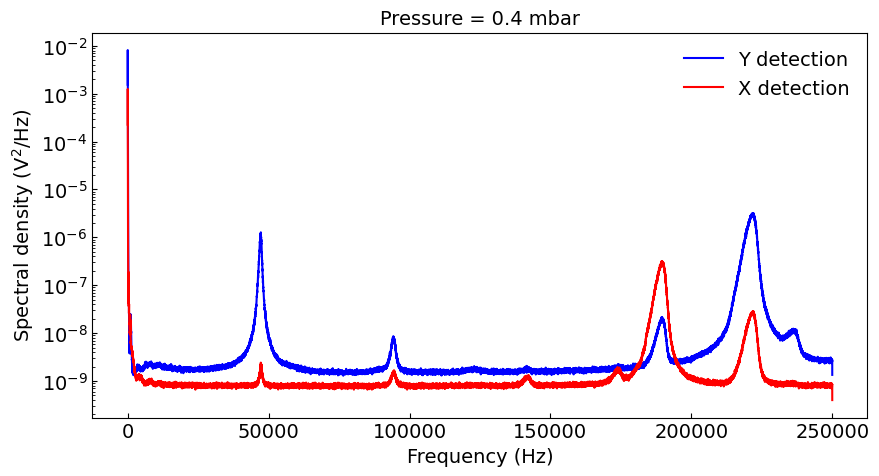

In [3]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(ff, pp, 'b', label='Y detection')
ax.plot(ffx, ppx, 'r', label='X detection')

ax.set_title('Pressure = 0.4 mbar', fontsize=14)
ax.set_xlabel('Frequency (Hz)', fontsize=14)
ax.set_ylabel('Spectral density (V$^2$/Hz)', fontsize=14)

ax.set_yscale('log')
ax.legend(frameon=False, fontsize=14)
ax.tick_params(axis='both', which='both', direction='in', labelsize=14)


Amplitude: 451538962.44246155, central frequency: 47160.89988635386 Hz, gamma: 684.4799081069061 Hz


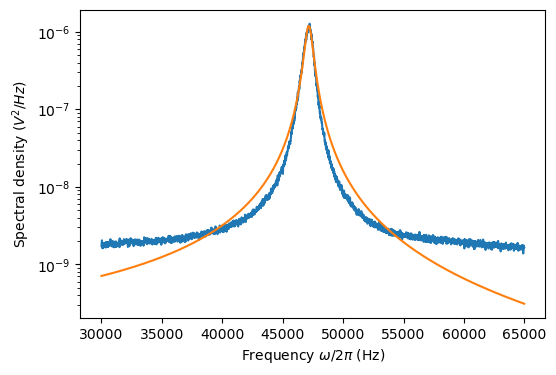

In [27]:
lb, ub = 3000, 6500
p0 = [3e8, 39000*2*np.pi, 4000]

fig, ax, popt = plot_and_fit_peak(ff, pp, lb, ub, p0)
amp, omega0, gamma = popt

In [28]:
T   = 300  # K
kb  = 1.38e-23

# Use this value after ethanol is gone
# rho = 1800 # kg/m^3

## Use this value if there is ethanol
rho = 2200 # kg/m^3

# r   = 167e-9 / 2
r   = 105e-9 / 2
m   = rho * (4 * np.pi / 3) * r**3 

# Again need to take care of 2 pi normalization
# because the formula assume integrating over `omega`, not `f`
# v2 = 0.5 * np.pi/(gamma * omega0**2) * amp * gamma / (2 * np.pi)

# If numerical integration is preferred
v2 = np.trapz(pp[lb:ub], ff[lb:ub] * 2 * np.pi) / (2 * np.pi)

# Calibration factor converting <V^2> to (x^2)
c_cal_square = (v2 * m * omega0**2) / (kb * T)
print(fr'Calibration factor square $c^2$: {c_cal_square}')

Calibration factor square $c^2$: 34098182530.15024


In [29]:
data_file = r"C:\Users\microspheres\Desktop\100nmsphere2\nohv_20s_48khz_4.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

ff, pp = get_psd(data)

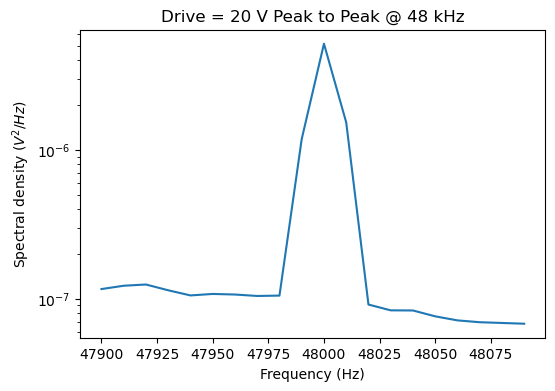

In [30]:
lb, ub = 4790, 4810
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(ff[lb:ub], pp[lb:ub])

ax.set_title('Drive = 20 V Peak to Peak @ 48 kHz')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Spectral density ($V^2 / Hz$)')

ax.set_yscale('log')

In [31]:
all_idx = np.arange(lb, ub, 1)
excluding_peak = np.logical_or(all_idx < 4796, all_idx > 4804)

area_all = np.trapz(pp[all_idx], ff[all_idx]*2*np.pi)
area_excluding_peak = np.trapz( pp[all_idx[excluding_peak]], ff[all_idx[excluding_peak]]*2*np.pi )

# Excluding background contribution (which is very small)
# Take care of 2 pi normalization after numerical integration
# because we integrated over omega here
v2_drive = (area_all - area_excluding_peak) / (2 * np.pi)

In [32]:
omega_drive = 48000 * 2 * np.pi

x2_drive = v2_drive / c_cal_square
f_amp_squared = x2_drive * 2 * m**2 * ( (omega0**2 - omega_drive**2)**2 + gamma**2 * omega_drive**2)

charge = np.sqrt(f_amp_squared) / (1.6e-19 * 250*10)
print(f'Charge on the sphere derived through a driving E field: +/- {charge:.2f} e')

Charge on the sphere derived through a driving E field: +/- 0.76 e
